In [57]:
# Import the libraries
!pip install rfpimp
!pip install rich
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
from rich import print
from rich.panel import Panel
from rich.console import Console

ERROR: Could not find a version that satisfies the requirement rfpimp (from versions: none)
ERROR: No matching distribution found for rfpimp


In [58]:
# Import the data
Churn_Data =pd.read_csv("/kaggle/input/e-commerce-dataset/E-Commerce Churn Data.csv")
Churn_Data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [59]:
# Initial data summary

console = Console()
console.print(Panel("TOTAL COLUMNS: 20", title="DATA SUMMARY"))

print(Churn_Data.info())


╭───────────────────────────────────────────────── DATA SUMMARY ──────────────────────────────────────────────────╮
│ TOTAL COLUMNS: 20                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

None

# Data Cleaning

In [60]:
# Missing values summary

Churn_Data.replace(" ",np.nan)

console = Console()
console.print(Panel("INSIGHTS", title="DATA SUMMARY"))

print(Churn_Data.isnull().sum())

╭───────────────────────────────────────────────── DATA SUMMARY ──────────────────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [61]:
# Print the percentage of missing values in each column
console = Console()
console.print(Panel("INSIGHTS", title="MISSING VALUES PERCENTAGES"))

Churn_Data.isnull().sum()/len(Churn_Data)*100

╭────────────────────────────────────────── MISSING VALUES PERCENTAGES ───────────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

In [62]:
# Data Cleaning 1 -----> Removing rows with missing values

Churn_Data1 = Churn_Data.dropna()

print(f"The shape of new dataset is :{ Churn_Data1.shape} while that of old is { Churn_Data.shape}. \nThe number of rows dropped is { Churn_Data.shape[0] - Churn_Data1.shape[0]}")


print(" \nT H E R E F O R E   W E   C A N ' T   J U S T    D E L E T E   T H E   R O W S !")

The shape of new dataset is :(3774, 20) while that of old is (5630, 20). 
The number of rows dropped is 1856

T H E R E F O R E   W E   C A N ' T   J U S T    D E L E T E   T H E   R O W S !

In [63]:
# Data Cleaning 2
# fill the missing values using Imputers

Churn_Data['Churn'] = Churn_Data['Churn'].astype('category')
Churn_Data['SatisfactionScore'] = Churn_Data['SatisfactionScore'].astype('category')
Churn_Data['NumberOfAddress'] = Churn_Data['NumberOfAddress'].astype('category')
Churn_Data['Complain'] = Churn_Data['Complain'].astype('category')

In [64]:
# Convert all string categorical values to numerical
console = Console()
console.print(Panel("INSIGHTS", title="CATEGORICAL STRING COLUMNS"))

info_data = pd.DataFrame(Churn_Data.dtypes, columns=['Dtype'])
object_columns = info_data[info_data['Dtype'] == 'object']
print(object_columns)

╭────────────────────────────────────────── CATEGORICAL STRING COLUMNS ───────────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Dtype
PreferredLoginDevice  object
PreferredPaymentMode  object
Gender                object
PreferedOrderCat      object
MaritalStatus         object

In [65]:

# print out the unique values of categorical columns


console = Console()
console.print(Panel("INSIGHTS", title="UNIQUE VALUES SUMMARY"))


print(f"PreferredLoginDevice : { Churn_Data['PreferredLoginDevice'].unique() }")
Churn_Data['PreferredLoginDevice'] = Churn_Data['PreferredLoginDevice'].replace('Phone','Mobile Phone')

print(f"PreferredPaymentMode : { Churn_Data['PreferredPaymentMode'].unique() }")
Churn_Data['PreferredPaymentMode'] = Churn_Data['PreferredPaymentMode'].replace('COD','Cash on Delivery')
Churn_Data['PreferredPaymentMode'] = Churn_Data['PreferredPaymentMode'].replace('CC','Credit Card')

print(f"Gender : { Churn_Data['Gender'].unique() }")

print(f"PreferedOrderCat : { Churn_Data['PreferedOrderCat'].unique() }")
Churn_Data['PreferedOrderCat']=Churn_Data['PreferedOrderCat'].replace('Mobile','Mobile Phone')

print(f"PreferedOrderCat : { Churn_Data['PreferedOrderCat'].unique() }")

print(f"MaritalStatus : { Churn_Data['MaritalStatus'].unique() }")

╭───────────────────────────────────────────── UNIQUE VALUES SUMMARY ─────────────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']

PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender : ['Female' 'Male']

PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

PreferedOrderCat : ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

MaritalStatus : ['Single' 'Divorced' 'Married']

In [66]:

# one hot encoding 

Churn_Data['PreferredLoginDevice'] = Churn_Data['PreferredLoginDevice'].astype('category')
Churn_Data['PreferredPaymentMode'] = Churn_Data['PreferredPaymentMode'].astype('category')
Churn_Data['Gender'] = Churn_Data['Gender'].astype('category')
Churn_Data['PreferedOrderCat'] = Churn_Data['PreferedOrderCat'].astype('category')
Churn_Data['MaritalStatus'] = Churn_Data['MaritalStatus'].astype('category')


Churn_Data =pd.get_dummies(Churn_Data, columns=['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus'], drop_first=True)
Churn_Data


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,True,False,False,False,False,True,False,False,False,True
1,50002,1,NaN,1,8.0,3.0,4,3,7,1,...,False,False,True,True,False,False,True,False,False,True
2,50003,1,NaN,1,30.0,2.0,4,3,6,1,...,True,False,False,True,False,False,True,False,False,True
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,True,False,False,True,False,True,False,False,False,True
4,50005,1,0.0,1,12.0,NaN,3,5,3,0,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,1,30.0,3.0,2,1,6,0,...,False,False,False,True,False,True,False,False,True,False
5626,55627,0,13.0,1,13.0,3.0,5,5,6,0,...,False,False,False,True,False,False,False,False,True,False
5627,55628,0,1.0,1,11.0,3.0,2,4,3,1,...,True,False,False,True,False,True,False,False,True,False
5628,55629,0,23.0,3,9.0,4.0,5,4,4,0,...,False,False,False,True,False,True,False,False,True,False


In [67]:
# Iterative Imputers

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iterative_imputer = IterativeImputer()

# Impute missing values
Churn_Data_imputed = pd.DataFrame(iterative_imputer.fit_transform(Churn_Data), columns=Churn_Data.columns)

print(Churn_Data_imputed)

CustomerID  Churn     Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0        50001.0    1.0   4.000000       3.0              6.0        3.000000   
1        50002.0    1.0   2.201244       1.0              8.0        3.000000   
2        50003.0    1.0   3.071008       1.0             30.0        2.000000   
3        50004.0    1.0   0.000000       3.0             15.0        2.000000   
4        50005.0    1.0   0.000000       1.0             12.0        2.161183   
...          ...    ...        ...       ...              ...             ...   
5625     55626.0    0.0  10.000000       1.0             30.0        3.000000   
5626     55627.0    0.0  13.000000       1.0             13.0        3.000000   
5627     55628.0    0.0   1.000000       1.0             11.0        3.000000   
5628     55629.0    0.0  23.000000       3.0              9.0        4.000000   
5629     55630.0    0.0   8.000000       1.0             15.0        3.000000   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                          3.0                2.0              9.0       1.0   
1                          4.0                3.0              7.0       1.0   
2                          4.0                3.0              6.0       1.0   
3                          4.0                5.0              8.0       0.0   
4                          3.0                5.0              3.0       0.0   
...                        ...                ...              ...       ...   
5625                       2.0                1.0              6.0       0.0   
5626                       5.0                5.0              6.0       0.0   
5627                       2.0                4.0              3.0       1.0   
5628                       5.0                4.0              4.0       0.0   
5629                       2.0                3.0              4.0       0.0   

      ...  PreferredPaymentMode_Debit Card  PreferredPaymentMode_E wallet  \
0     ...                              1.0                            0.0   
1     ...                              0.0                            0.0   
2     ...                              1.0                            0.0   
3     ...                              1.0                            0.0   
4     ...                              0.0                            0.0   
...   ...                              ...                            ...   
5625  ...                              0.0                            0.0   
5626  ...                              0.0                            0.0   
5627  ...                              1.0                            0.0   
5628  ...                              0.0                            0.0   
5629  ...                              0.0                            0.0   

      PreferredPaymentMode_UPI  Gender_Male  PreferedOrderCat_Grocery  \
0                          0.0          0.0                       0.0   
1                          1.0          1.0                       0.0   
2                          0.0          1.0                       0.0   
3                          0.0          1.0                       0.0   
4                          0.0          1.0                       0.0   
...                        ...          ...                       ...   
5625                       0.0          1.0                       0.0   
5626                       0.0          1.0                       0.0   
5627                       0.0          1.0                       0.0   
5628                       0.0          1.0                       0.0   
5629                       0.0          1.0                       0.0   

      PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile Phone  \
0                                     1.0                            0.0   
1                                     0.0                            1.0   
2                                     0.0 

# Exporatory Data Analysis

In [68]:
Churn_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   CustomerID                           5630 non-null   int64   
 1   Churn                                5630 non-null   category
 2   Tenure                               5366 non-null   float64 
 3   CityTier                             5630 non-null   int64   
 4   WarehouseToHome                      5379 non-null   float64 
 5   HourSpendOnApp                       5375 non-null   float64 
 6   NumberOfDeviceRegistered             5630 non-null   int64   
 7   SatisfactionScore                    5630 non-null   category
 8   NumberOfAddress                      5630 non-null   category
 9   Complain                             5630 non-null   category
 10  OrderAmountHikeFromlastYear          5365 non-null   float64 
 11  CouponUsed       

In [69]:
#sns.set()

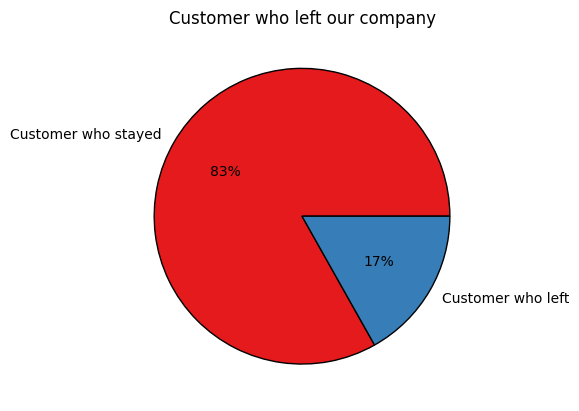

╭──────────────────────────────────────── CUSTOMERS WHO LEFT THE COMPANY ─────────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

About 17% of total Customers left the company.

In [70]:
#labels
lab = Churn_Data["Churn"].value_counts().keys().tolist()
#values
val = Churn_Data["Churn"].value_counts().values.tolist()

#changing labels which is more readable for stakeholders
lab = ['Customer who stayed', 'Customer who left']

# plotting data on chart
plt.pie(val, labels=lab, colors=sns.color_palette('Set1'), autopct='%.0f%%',wedgeprops=dict(edgecolor='black'))

plt.title('Customer who left our company')

# displaying chart
plt.show()
# Insights
console = Console()
console.print(Panel("INSIGHTS", title="CUSTOMERS WHO LEFT THE COMPANY"))

print(f'About 17% of total Customers left the company.')

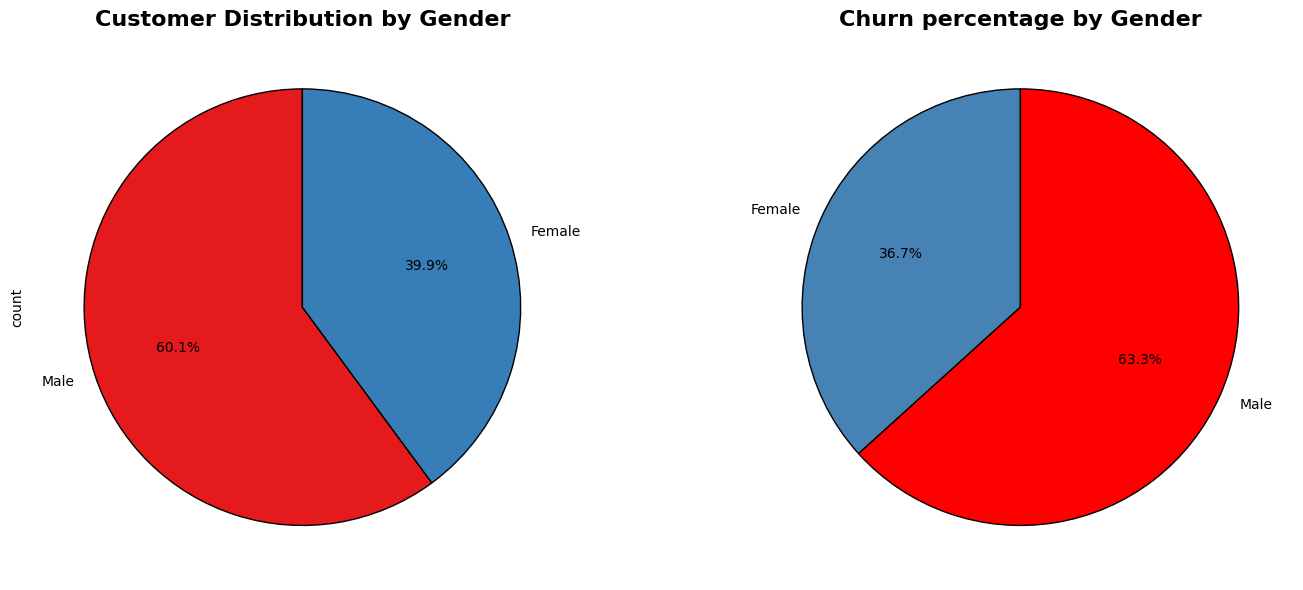

╭───────────────────────────────────────────── CHURN COUNT BY GENDER ─────────────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

About 60.1% of total customers are male and 39.9% are female. Out of the customers who left 63.3% are Male while 
36.7% are female.
Male Dominated Customer Base
Higher male churn rate
Males are more likely to churn compared to females in relative terms
Potential Target Area for Retention
The company must focus on improving male retention rate
Female Retention Appears Stronger
With the small female customer base, company is successfull in retaining them.

In [71]:
# Recreate a 'Gender' column based on 'Gender_Male' column
Churn_Data['Gender'] = Churn_Data['Gender_Male'].apply(lambda x: 'Male' if x == 1 else 'Female')

# Set figure size
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Calculate customer distribution by gender
gender_counts = Churn_Data['Gender'].value_counts()
gender_counts.plot.pie(ax=axs[0], labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set1'), wedgeprops=dict(edgecolor='black'))
axs[0].set_title('Customer Distribution by Gender', fontsize=16, fontweight='bold')

# Calculate churn percentage by gender
churn_counts = Churn_Data.groupby('Gender')['Churn'].value_counts().unstack()
churn_counts.plot.pie(y=1,ax=axs[1], autopct='%1.1f%%', labels=churn_counts.index,startangle=90, colors=["steelblue", "red"], legend=False,wedgeprops=dict(edgecolor='black'))
axs[1].set_title('Churn percentage by Gender', fontsize=16, fontweight='bold')
axs[1].set_ylabel('')  # Hide the y-label for a cleaner look

# Display the plot
plt.tight_layout()
plt.show()

# Insights
console = Console()
console.print(Panel("INSIGHTS", title="CHURN COUNT BY GENDER"))

print(f"About 60.1% of total customers are male and 39.9% are female. Out of the customers who left 63.3% are Male while 36.7% are female.\n[bold red]Male Dominated Customer Base[/bold red]\n[bold red]Higher male churn rate[/bold red]\nMales are more likely to churn compared to females in relative terms\n[bold red]Potential Target Area for Retention[/bold red]\nThe company must focus on improving male retention rate\n[bold red]Female Retention Appears Stronger[/bold red]\nWith the small female customer base, company is successfull in retaining them.")


In [72]:
Churn_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   CustomerID                           5630 non-null   int64   
 1   Churn                                5630 non-null   category
 2   Tenure                               5366 non-null   float64 
 3   CityTier                             5630 non-null   int64   
 4   WarehouseToHome                      5379 non-null   float64 
 5   HourSpendOnApp                       5375 non-null   float64 
 6   NumberOfDeviceRegistered             5630 non-null   int64   
 7   SatisfactionScore                    5630 non-null   category
 8   NumberOfAddress                      5630 non-null   category
 9   Complain                             5630 non-null   category
 10  OrderAmountHikeFromlastYear          5365 non-null   float64 
 11  CouponUsed       

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



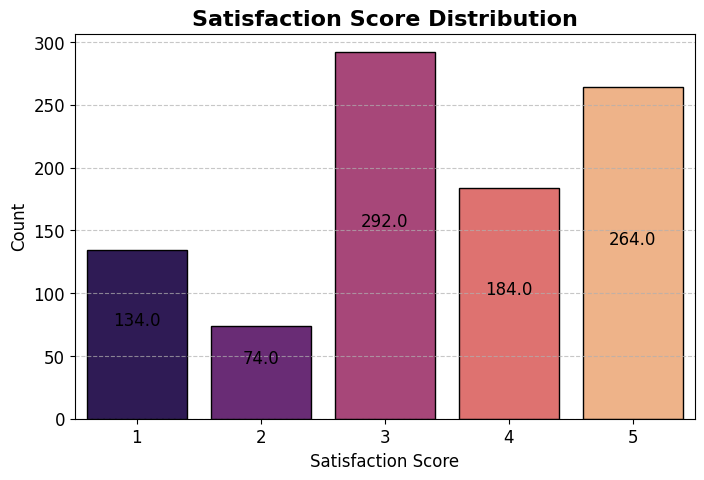

╭──────────────────────────────────────── SATISFACTION SCORE DISTRIBUTION ────────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Most of the Customers who left rated the service with satisfaction score of 3.
About 21.94% of customers rated the service low while 78.06% rated the service average to high.
Customers with asatisfaction Score of 3
These customers are at the risk of leaving as they are not fully satisfied but haven't disengaged yet. The 
marketing strategy must focus on retaining these group of people, like providing them with personalised offers and 
surprise perks. Also it's important to collect their feedback.
Customers with low satisfaction scores
Much more aggresive actions should be taken for these groups, their complaints must be heard and addressed, and 
compensated.
Customers with high rating
These customers are more likely to stay. They must be rewarded with loyality and their engagement milestones should
be celebrated.

In [73]:
#data of customers who left
Churn_Data_Y= Churn_Data[Churn_Data['Churn']==1]

#data of customers who stayed
Churn_Data_N= Churn_Data[Churn_Data['Churn']==0]

#Satisfaction Score Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='SatisfactionScore', data=Churn_Data_Y, palette='magma', edgecolor='black')
plt.title('Satisfaction Score Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Satisfaction Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating data
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()/2), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                       textcoords='offset points')
plt.show()


# Insights
console = Console()
console.print(Panel("INSIGHTS", title="SATISFACTION SCORE DISTRIBUTION"))
print(f"Most of the Customers who left rated the service with satisfaction score of 3.\nAbout {((134+74)/(134+74+292+184+264)*100):.2f}% of customers rated the service low while {((292+184+264)/(134+74+292+184+264))*100:.2f}% rated the service average to high.\n[bold red]Customers with asatisfaction Score of 3[/bold red]\nThese customers are at the risk of leaving as they are not fully satisfied but haven't disengaged yet. The marketing strategy must focus on retaining these group of people, like providing them with personalised offers and surprise perks. Also it's important to collect their feedback.\n[red bold]Customers with low satisfaction scores[/bold red]\nMuch more aggresive actions should be taken for these groups, their complaints must be heard and addressed, and compensated.\n[bold red]Customers with high rating[/bold red]\nThese customers are more likely to stay. They must be rewarded with loyality and their engagement milestones should be celebrated. ")




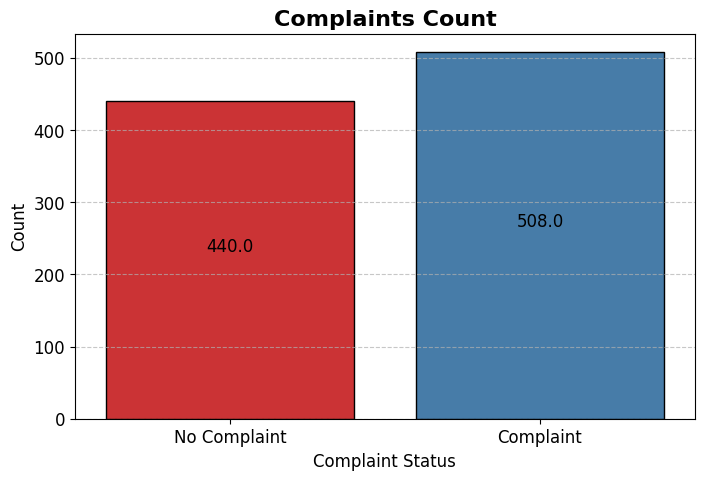

╭─────────────────────────────────────────────── COMPLAINTS COUNT ────────────────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

About 53.59% of Customers who left filed complaints. while 46.41% never reported any complaints.
Improve customer service
More than half of customers who churned had filled a complaint. Complaints can be an indicator that a customer 
might churn, it is important to set effective strategies to deal with and resolve customer complaints. It is thus 
important to improve company's customer service.
Silent Churners
An intersting fact is that nearly half of the customers are silent churners , that means they never filed any 
complaints. This is an important issue that must be resolved. This means that company's complaint receiving system.
Company must find ways to engage these customers, may be providing regular satisfaction surveys. Company must not 
also solely depend on customer complaints to improve customer satisfaction but find other ways too

In [74]:
# Complaints Count
plt.figure(figsize=(8, 5))
sns.countplot(x='Complain', data=Churn_Data_Y, palette='Set1', edgecolor='black')
plt.title('Complaints Count', fontsize=16, fontweight='bold')
plt.xlabel('Complaint Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Complaint', 'Complaint'], fontsize=12)  # Custom labels for better understanding
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()/2), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                       textcoords='offset points')
plt.show()


# Insights

console = Console()
console.print(Panel("INSIGHTS", title="COMPLAINTS COUNT"))

print(f"About {((508/(440+508))*100):.2f}% of Customers who left filed complaints. while {((440/(440+508))*100):.2f}% never reported any complaints.\n[bold red]Improve customer service\n[/bold red]More than half of customers who churned had filled a complaint. Complaints can be an indicator that a customer might churn, it is important to set effective strategies to deal with and resolve customer complaints. It is thus important to improve company's customer service.\n[bold red]Silent Churners[/bold red]\nAn intersting fact is that nearly half of the customers are silent churners , that means they never filed any complaints. This is an important issue that must be resolved. This means that company's complaint receiving system. Company must find ways to engage these customers, may be providing regular satisfaction surveys. Company must not also solely depend on customer complaints to improve customer satisfaction but find other ways too ")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



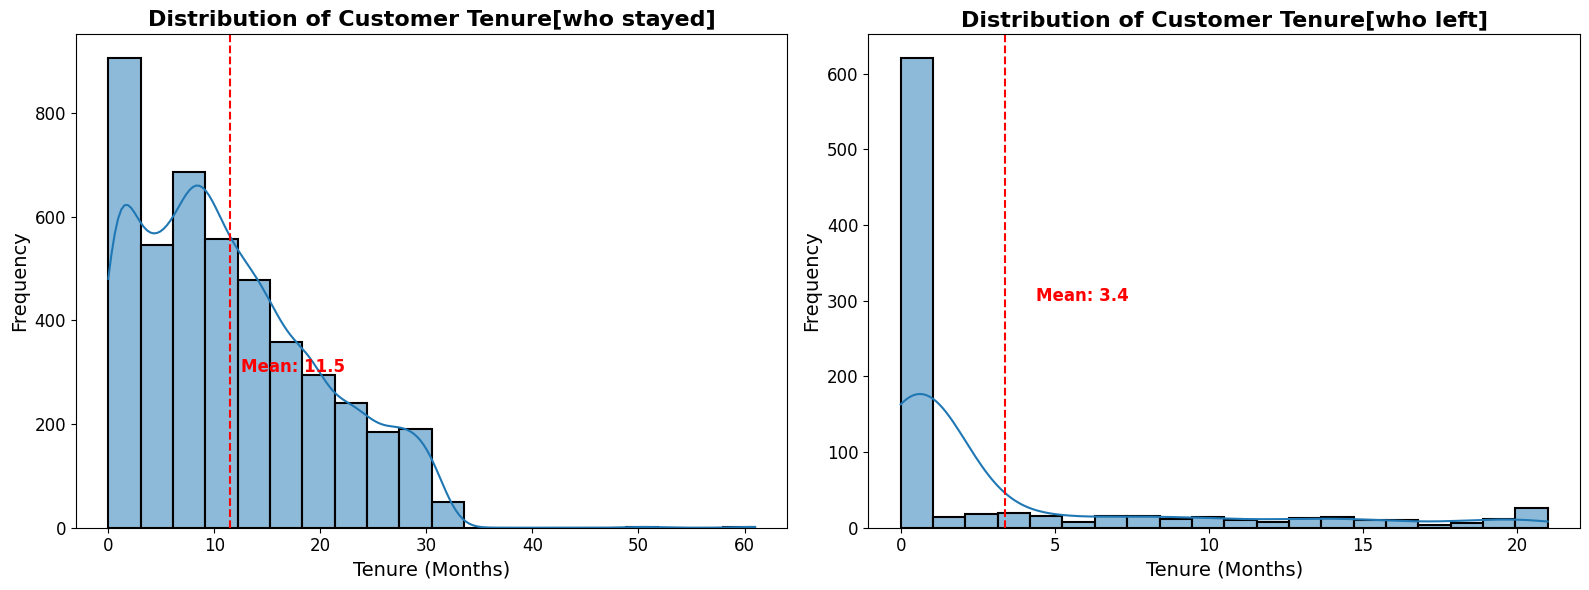

╭──────────────────────────────────────── DISTRIBUTION OF CUSTOMER TENURE ────────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

The mean value of tenure for customers who left is 3.4 and it is right skewed. While the mean fo who stayed is 11.5
Significant difference in tenure
Customers who stay tend to have a longer engagement with the service.
Focus on short term Customers
Most customers tend to leave before 3.4 months.We must focus on making our customers remain satisfied in the early 
months, ensure their engagement through providing with welcome package and offers. Provide them with loyalty 
rewards and celebrate their engagement milestones. They must be provided with personalized offers.Conduct 
satisfaction surveys and monito the new customers closely in their early periods.
Customers with long term tenure
There are a small percentage of customers who leave who have high tenure. They must be provided with personalized 
offers, loyalty programs, refferal programs and so on

In [75]:
# Distribution of Tenure customers who stayed
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns
sns.histplot(Churn_Data_N['Tenure'], bins=20, kde=True, color='#1f77b4', edgecolor='black', linewidth=1.5,ax=axs[0])
axs[0].set_title('Distribution of Customer Tenure[who stayed]', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Tenure (Months)', fontsize=14)
axs[0].set_ylabel('Frequency', fontsize=14)
axs[0].tick_params(axis='both', labelsize=12)
# Adding annotations (mean)
mean_tenure = Churn_Data_N['Tenure'].mean()
axs[0].axvline(mean_tenure, color='red', linestyle='--', linewidth=1.5)
axs[0].text(mean_tenure + 1, 300, f'Mean: {mean_tenure:.1f}', color='red', fontsize=12, fontweight='bold')

# Distribution of Tenure of customers who left
sns.histplot(Churn_Data_Y['Tenure'], bins=20, kde=True, color='#1f77b4', edgecolor='black', linewidth=1.5,ax=axs[1])
axs[1].set_title('Distribution of Customer Tenure[who left]', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Tenure (Months)', fontsize=14)
axs[1].set_ylabel('Frequency', fontsize=14)
axs[1].tick_params(axis='both', labelsize=12)
# Adding annotations (mean)
mean_tenure = Churn_Data_Y['Tenure'].mean()
axs[1].axvline(mean_tenure, color='red', linestyle='--', linewidth=1.5)
axs[1].text(mean_tenure + 1, 300, f'Mean: {mean_tenure:.1f}', color='red', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()



# Insights

console = Console()
console.print(Panel("INSIGHTS", title="DISTRIBUTION OF CUSTOMER TENURE"))
print(f"The mean value of tenure for customers who left is 3.4 and it is right skewed. While the mean fo who stayed is 11.5\n[bold red]Significant difference in tenure[/bold red]\nCustomers who stay tend to have a longer engagement with the service.\n[bold red]Focus on short term Customers[/bold red]\nMost customers tend to leave before 3.4 months.We must focus on making our customers remain satisfied in the early months, ensure their engagement through providing with welcome package and offers. Provide them with loyalty rewards and celebrate their engagement milestones. They must be provided with personalized offers.Conduct satisfaction surveys and monito the new customers closely in their early periods.\n[bold red]Customers with long term tenure[/bold red]\nThere are a small percentage of customers who leave who have high tenure. They must be provided with personalized offers, loyalty programs, refferal programs and so on")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



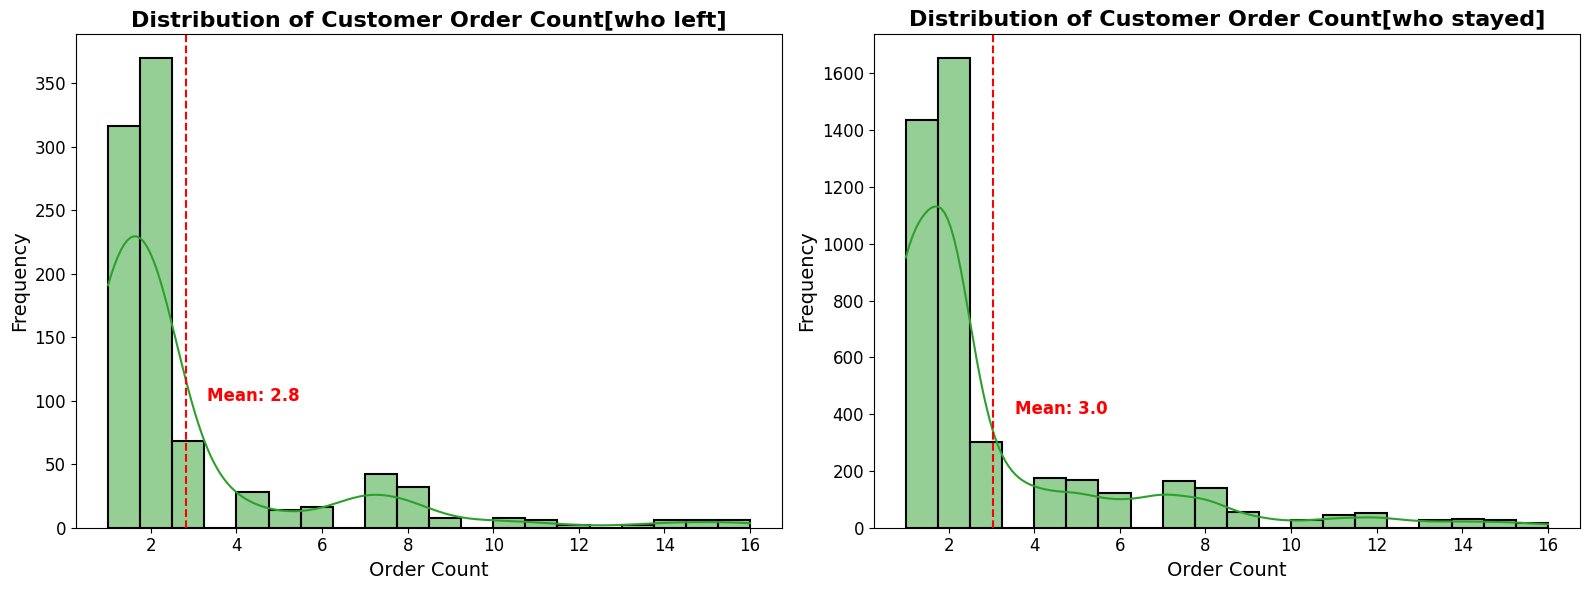

╭───────────────────────────────────── DISTRIBUTION OF CUSTOMER ORDER COUNT ──────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

The mean value of Customer Order Count for customers who stayed is 3 and who left is 2.8.
Slight Difference in Order Count
Although the difference seems small, it indicates that customers who left had slightly fewer orders on average.
Potential Early Warning Indicator
The lower average order count can be an early indicator that customer might churn. We can monitor customer order 
pattern in this case.

In [76]:
# Distribution of Order Count of customers who left
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Distribution of Order Count of Customers who left
sns.histplot(Churn_Data_Y['OrderCount'], bins=20, kde=True, color='#2ca02c', edgecolor='black', linewidth=1.5,ax=axs[0])
axs[0].set_title('Distribution of Customer Order Count[who left]', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Order Count', fontsize=14)
axs[0].set_ylabel('Frequency', fontsize=14)
axs[0].tick_params(axis='both', labelsize=12)
# Adding annotations (mean)
mean_ordercount = Churn_Data_Y['OrderCount'].mean()
axs[0].axvline(mean_ordercount, color='red', linestyle='--', linewidth=1.5)
axs[0].text(mean_ordercount + 0.5, 100, f'Mean: {mean_ordercount:.1f}', color='red', fontsize=12, fontweight='bold')



# Distribution of Order Count of Customers who stayed
sns.histplot(Churn_Data_N['OrderCount'], bins=20, kde=True, color='#2ca02c', edgecolor='black', linewidth=1.5,ax=axs[1])
axs[1].set_title('Distribution of Customer Order Count[who stayed]', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Order Count', fontsize=14)
axs[1].set_ylabel('Frequency', fontsize=14)
axs[1].tick_params(axis='both', labelsize=12)
# Adding annotations (mean)
mean_ordercount = Churn_Data_N['OrderCount'].mean()
axs[1].axvline(mean_ordercount, color='red', linestyle='--', linewidth=1.5)
axs[1].text(mean_ordercount + 0.5, 400, f'Mean: {mean_ordercount:.1f}', color='red', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Insights

console = Console()
console.print(Panel("INSIGHTS", title="DISTRIBUTION OF CUSTOMER ORDER COUNT"))

print(f"The mean value of Customer Order Count for customers who stayed is 3 and who left is 2.8.\n[bold red]Slight Difference in Order Count[/bold red]\nAlthough the difference seems small, it indicates that customers who left had slightly fewer orders on average.\n[bold red]Potential Early Warning Indicator[/bold red]\nThe lower average order count can be an early indicator that customer might churn. We can monitor customer order pattern in this case.")

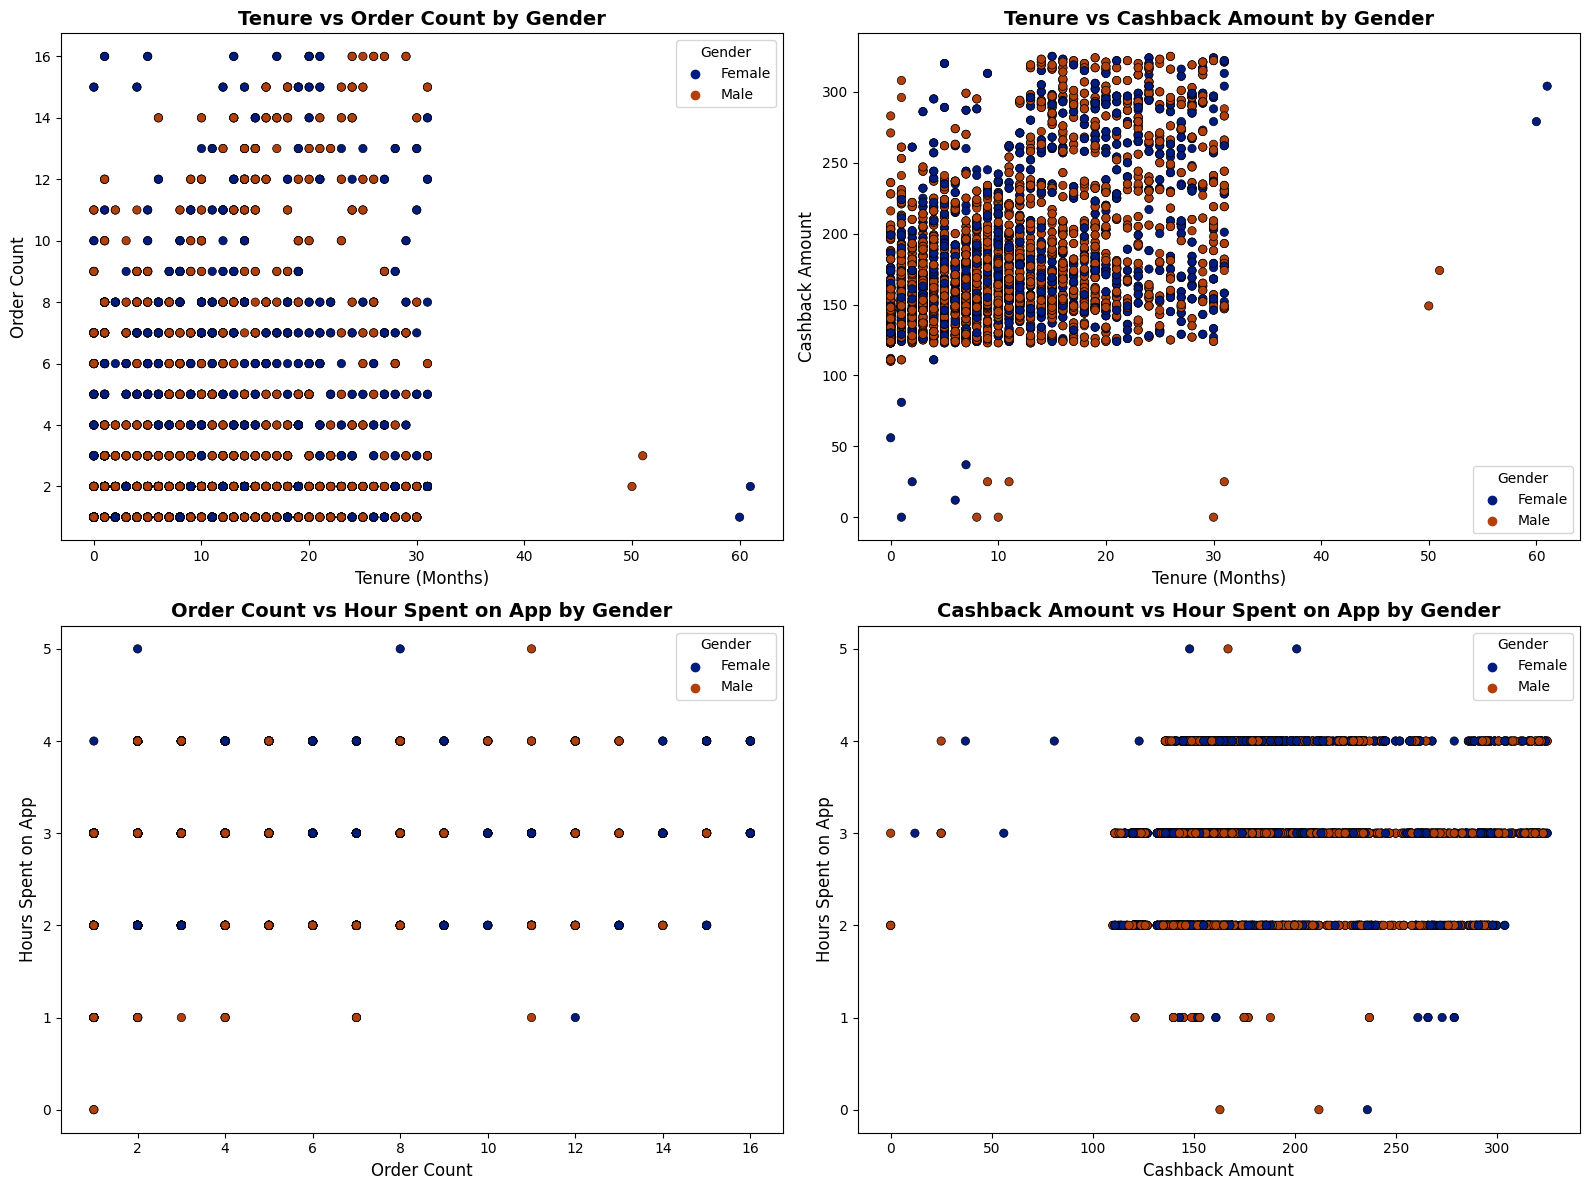

╭───────────────────────────────────────────────── SCATTERPLOTS ──────────────────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

There is no noticeable difference in the behavior of male and female customers across key variables like tenure, 
order count, cashback amount, and time spent on the app.
Order Count and Cashback Amount seem to be relatively independent of the Hours Spent on App, indicating that 
customers may place orders or receive cashback without spending significantly more time on the app.
These insights suggest that gender may not play a significant role in driving differences in customer behavior 
across these variables.

In [77]:

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Scatter plot for Tenure vs OrderCount
sns.scatterplot(data=Churn_Data, x='Tenure', y='OrderCount', hue='Gender', palette='dark', edgecolor='black', ax=axs[0, 0])
axs[0, 0].set_title('Tenure vs Order Count by Gender', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Tenure (Months)', fontsize=12)
axs[0, 0].set_ylabel('Order Count', fontsize=12)

# Scatter plot for Tenure vs CashbackAmount
sns.scatterplot(data=Churn_Data, x='Tenure', y='CashbackAmount', hue='Gender', palette='dark', edgecolor='black', ax=axs[0, 1])
axs[0, 1].set_title('Tenure vs Cashback Amount by Gender', fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Tenure (Months)', fontsize=12)
axs[0, 1].set_ylabel('Cashback Amount', fontsize=12)

# Scatter plot for OrderCount vs HourSpendOnApp
sns.scatterplot(data=Churn_Data, x='OrderCount', y='HourSpendOnApp', hue='Gender', palette='dark', edgecolor='black', ax=axs[1, 0])
axs[1, 0].set_title('Order Count vs Hour Spent on App by Gender', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Order Count', fontsize=12)
axs[1, 0].set_ylabel('Hours Spent on App', fontsize=12)

# Scatter plot for CashbackAmount vs HourSpendOnApp
sns.scatterplot(data=Churn_Data, x='CashbackAmount', y='HourSpendOnApp', hue='Gender', palette='dark', edgecolor='black', ax=axs[1, 1])
axs[1, 1].set_title('Cashback Amount vs Hour Spent on App by Gender', fontsize=14, fontweight='bold')
axs[1, 1].set_xlabel('Cashback Amount', fontsize=12)
axs[1, 1].set_ylabel('Hours Spent on App', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

console = Console()
console.print(Panel("INSIGHTS", title="SCATTERPLOTS"))

print(f"There is no noticeable difference in the behavior of male and female customers across key variables like tenure, order count, cashback amount, and time spent on the app.\nOrder Count and Cashback Amount seem to be relatively independent of the Hours Spent on App, indicating that customers may place orders or receive cashback without spending significantly more time on the app.\nThese insights suggest that gender may not play a significant role in driving differences in customer behavior across these variables.")




In [78]:
# variable summary
Churn_Data['Churn'] = Churn_Data['Churn'].astype('int64')
Churn_Data['SatisfactionScore'] = Churn_Data['SatisfactionScore'].astype('int64')
Churn_Data['NumberOfAddress'] = Churn_Data['NumberOfAddress'].astype('int64')
Churn_Data['Complain'] = Churn_Data['Complain'].astype('int64')
summary = Churn_Data.describe().transpose()
summary

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


In [79]:
Churn_Data_numeric = Churn_Data.select_dtypes(include=['number'])

#correlation
correlation = Churn_Data_numeric.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

In [80]:
#convert to array
corr_array  = np.array(correlation)

In [81]:
correlation

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,1.000000,-0.019083,0.029952,0.003239,0.058909,0.598417,0.411098,-0.033146,0.160814,-0.009944,0.117243,0.234302,0.139008,0.113243,0.217173
Churn,-0.019083,1.000000,-0.349408,0.084703,0.076630,0.018675,0.107939,0.105481,0.043931,0.250188,-0.010058,-0.008264,-0.028697,-0.160757,-0.154161
Tenure,0.029952,-0.349408,1.000000,-0.060688,-0.018218,-0.021226,-0.023983,-0.013903,0.237666,-0.021268,0.005825,0.129035,0.186403,0.184552,0.476577
CityTier,0.003239,0.084703,-0.060688,1.000000,0.010624,-0.009150,0.027934,-0.011554,-0.029440,0.003375,-0.031408,0.021456,0.033388,0.017525,0.055698
WarehouseToHome,0.058909,0.076630,-0.018218,0.010624,1.000000,0.060990,0.019071,0.007722,-0.011020,0.028696,0.038795,-0.003935,0.002681,0.017829,-0.009536
HourSpendOnApp,0.598417,0.018675,-0.021226,-0.009150,0.060990,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121469
NumberOfDeviceRegistered,0.411098,0.107939,-0.023983,0.027934,0.019071,0.316800,1.000000,-0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137396
SatisfactionScore,-0.033146,0.105481,-0.013903,-0.011554,0.007722,0.031858,-0.017228,1.000000,0.053583,-0.031115,-0.027730,0.017936,0.019764,0.032082,0.003429
NumberOfAddress,0.160814,0.043931,0.237666,-0.029440,-0.011020,0.145126,0.084997,0.053583,1.000000,-0.026399,0.015533,0.042120,-0.007609,-0.064847,0.186802
Complain,-0.009944,0.250188,-0.021268,0.003375,0.028696,0.006976,0.003407,-0.031115,-0.026399,1.000000,-0.004529,-0.008174,-0.019307,-0.043546,0.000598


In [82]:
# Plotting the Heatmap
trace = go.Heatmap(
    z = corr_array,
    x = matrix_cols,
    y = matrix_cols,
    colorscale = "Plasma", 
    colorbar=dict(
        title="Pearson Correlation Coefficient",
        titleside="right",
        tickvals=[-1, -0.5, 0, 0.5, 1],
        ticks="outside"
    ),


    hovertemplate = 'X: %{x}<br>Y: %{y}<br>Correlation: %{z:.2f}',  # Adding detailed hover information as there are lot of features
)

# Layout of the Heatmap
layout = go.Layout(


    title=dict(
        text="Correlation Matrix for Variables", 
        x=0.5,  # Centering the title
        font=dict(size=16, color='black')
    ),


    autosize=False,
    height=800,
    width=850,
    margin=dict(r=20, l=150, t=50, b=150),  # Optimized margins for better spacing
    
    
    xaxis=dict(
        tickfont=dict(size=10), 
        title="Features",  
        titlefont=dict(size=12)
    ),


    yaxis=dict(
        tickfont=dict(size=10), 
        title="Features",  # Added axis title
        titlefont=dict(size=12)
    ),

    
    hovermode='closest',  # Enhanced hover mode for better interactivity
)


data = [trace]
fig = go.Figure(data=data, layout=layout)

# Plot the heatmap
py.iplot(fig)

# MODELLING

In [83]:
# Training using data
X=Churn_Data_imputed.drop("Churn",axis=1)
y=Churn_Data_imputed["Churn"]
from  sklearn import tree
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=342)

In [84]:
# Training the model with Data
from rfpimp import *
model=tree.DecisionTreeClassifier(random_state=24)
model.fit(X_train,y_train)

ModuleNotFoundError: No module named 'rfpimp'

In [ ]:
from rich.text import Text
console = Console()

# Define the scores
training_score = f'{model.score(X_train,y_train):.2%}%'
testing_score = f'{model.score(X_test,y_test):.2%}%'

# Create stylized text for Training and Testing scores
training_text = Text("T H E   T R A I N I N G   S C O R E   O F   M O D E L :", style="bold green")
training_text.append(f" {training_score}", style="bold yellow")

testing_text = Text("T H E   T E S T I N G   S C O R E   O F   M O D E L :", style="bold green")
testing_text.append(f" {testing_score}", style="bold yellow")

# Display the results in panels
console.print(Panel(training_text, title="TRAINING SCORE", title_align="left", border_style="green"))
console.print(Panel(testing_text, title="TESTING SCORE", title_align="left", border_style="green"))

In [ ]:
prediction=model.predict(X_test)
prediction_df = pd.DataFrame(prediction, columns=['Predicted'])
result_df = pd.concat([X_test.reset_index(drop=True), prediction_df], axis=1)
result_df.head()

In [ ]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(prediction, y_test), annot = True,fmt=".5g")

In [ ]:
# Feature Importance
feature_importances=model.feature_importances_
rea=pd.Series(index=model.feature_names_in_,data=model.feature_importances_)
sorted=rea.sort_values(ascending=False)
df=pd.DataFrame(sorted)

In [ ]:
rea=pd.Series(index=model.feature_names_in_,data=model.feature_importances_)
import matplotlib.pyplot as plt
plt.barh(rea.sort_values().index,rea.sort_values())
plt.title("FEATURE IMPORTANCE",fontsize=14)

In [ ]:
from sklearn .linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

In [ ]:
from rich.text import Text
console = Console()

# Define the scores
training_score = f'{model.score(X_train,y_train):.2%}%'
testing_score = f'{model.score(X_test,y_test):.2%}%'

# Create stylized text for Training and Testing scores
training_text = Text("T H E   T R A I N I N G   S C O R E   O F   M O D E L :", style="bold green")
training_text.append(f" {training_score}", style="bold yellow")

testing_text = Text("T H E   T E S T I N G   S C O R E   O F   M O D E L :", style="bold green")
testing_text.append(f" {testing_score}", style="bold yellow")

# Display the results in panels
console.print(Panel(training_text, title="TRAINING SCORE", title_align="left", border_style="green"))
console.print(Panel(testing_text, title="TESTING SCORE", title_align="left", border_style="green"))

In [ ]:
prediction=model.predict(X_test)
prediction_df = pd.DataFrame(prediction, columns=['Predicted'])
result_df = pd.concat([X_test.reset_index(drop=True), prediction_df], axis=1)
result_df.head()

In [ ]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(prediction, y_test), annot = True,fmt=".5g")

In [ ]:
# You can tune the model to increase accuracy and generality by changing hyperparameters. 